=== Regresión para el primer bloque ===
                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.602e+25
Date:                Sun, 02 Mar 2025   Prob (F-statistic):               0.00
Time:                        08:59:14   Log-Likelihood:                 2817.9
No. Observations:                 106   AIC:                            -5620.
Df Residuals:                      98   BIC:                            -5599.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1795: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1795: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.11/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


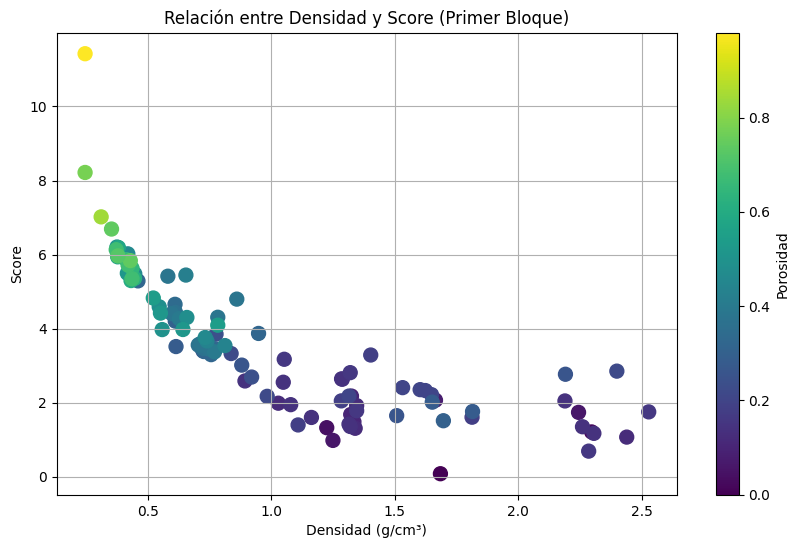

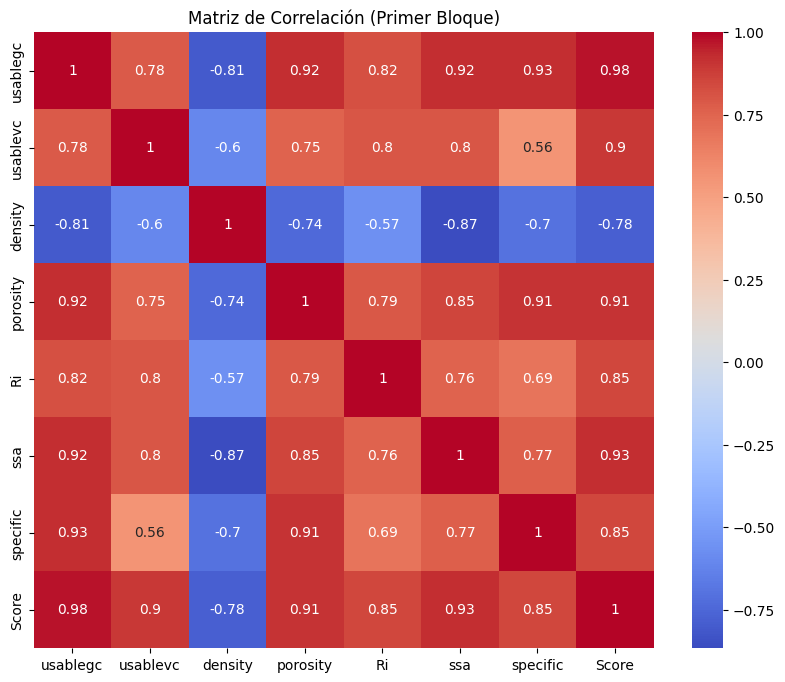

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el archivo Excel
file_path = "Parametros_material_juego.xlsx"
df = pd.read_excel(file_path, sheet_name="structuralparameters-vs-capacit")

# ====================================================
# Primer bloque de datos
# Variables: usablegc, usablevc, density, porosity, Ri, ssa, specific (independientes) y Score (dependiente)
# ====================================================
cols_model1 = ['usablegc', 'usablevc', 'density', 'porosity', 'Ri', 'ssa', 'specific', 'Score']
data1 = df[cols_model1].dropna()  # Eliminar filas con datos faltantes

# Definir variables independientes (X) y la dependiente (y)
X1 = data1[['usablegc', 'usablevc', 'density', 'porosity', 'Ri', 'ssa', 'specific']]
y1 = data1['Score']

# Agregar constante (intercepto)
X1 = sm.add_constant(X1)

# Ajustar el modelo de regresión
modelo1 = sm.OLS(y1, X1).fit()

# Calcular parámetros: coeficiente de correlación múltiple, R² y R² ajustado
R1 = np.sqrt(modelo1.rsquared)
R2_1 = modelo1.rsquared
R2ajustado1 = modelo1.rsquared_adj

print("=== Regresión para el primer bloque ===")
print(modelo1.summary())
print(f"\nCoeficiente de correlación múltiple: {R1:.6f}")
print(f"R²: {R2_1:.6f}")
print(f"R² ajustado: {R2ajustado1:.6f}")

# ====================================================
# Segundo bloque de datos
# Variables: usablegc.1, usablevc.1, density.1, porosity.1, Ri.1, ssa.1, specific.1 (independientes) y score (dependiente)
# ====================================================
cols_model2 = ['usablegc.1', 'usablevc.1', 'density.1', 'porosity.1', 'Ri.1', 'ssa.1', 'specific.1', 'score']
data2 = df[cols_model2].dropna()

X2 = data2[['usablegc.1', 'usablevc.1', 'density.1', 'porosity.1', 'Ri.1', 'ssa.1', 'specific.1']]
y2 = data2['score']

X2 = sm.add_constant(X2)
modelo2 = sm.OLS(y2, X2).fit()

R2 = np.sqrt(modelo2.rsquared)
R2_model2 = modelo2.rsquared
R2ajustado2 = modelo2.rsquared_adj

print("\n=== Regresión para el segundo bloque ===")
print(modelo2.summary())
print(f"\nCoeficiente de correlación múltiple: {R2:.6f}")
print(f"R²: {R2_model2:.6f}")
print(f"R² ajustado: {R2ajustado2:.6f}")

# ====================================================
# Gráficos para el primer bloque de datos
# ====================================================

# 1. Scatter plot: Relación entre Density y Score, coloreando por Porosity
plt.figure(figsize=(10,6))
scatter = plt.scatter(
    data1['density'],
    data1['Score'],
    c=data1['porosity'],
    cmap='viridis',
    s=100
)
plt.title('Relación entre Densidad y Score (Primer Bloque)')
plt.xlabel('Densidad (g/cm³)')
plt.ylabel('Score')
cbar = plt.colorbar(scatter)
cbar.set_label('Porosidad')
plt.grid(True)
plt.show()

# 2. Heatmap: Matriz de correlación entre las variables del primer bloque
corr_matrix = data1[['usablegc', 'usablevc', 'density', 'porosity', 'Ri', 'ssa', 'specific', 'Score']].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación (Primer Bloque)')
plt.show()
